In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
apps = pd.read_csv('apps_clean.csv')

In [3]:
apps.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Updated_year
0,4.1,159,19.0,10000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
1,3.9,967,14.0,500000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
2,4.7,87510,8.7,5000000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
3,4.5,215644,25.0,50000000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
4,4.3,967,2.8,100000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018


In [4]:
print(f'The shape of the data set is: {apps.shape} \n')
print(f'number of examples: {apps.shape[0]}')
print(f'number of features: {apps.shape[1]-1}')

The shape of the data set is: (8196, 96) 

number of examples: 8196
number of features: 95


## train test split

In [5]:
from sklearn.model_selection import train_test_split
test_size = 0.15
train, test = train_test_split(apps, test_size=test_size, random_state=0, shuffle=True)
label = 'Rating'
X_train, y_train = train.drop(label, axis=1), train[label]
X_test, y_test = test.drop(label, axis=1), test[label]

In [6]:
print(f'Train data shape is: {X_train.shape}')
print(f'Label train shape is: {y_train.shape} \n')
print(f'Test data shape is: {X_test.shape} ')
print(f'Label Test shape is: {y_test.shape}')

Train data shape is: (6966, 95)
Label train shape is: (6966,) 

Test data shape is: (1230, 95) 
Label Test shape is: (1230,)


Lable exploration of train

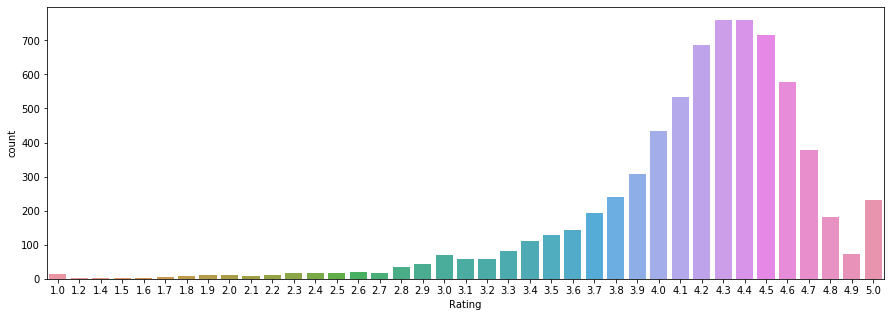

In [7]:
# lable exploration

plt.figure(figsize=(15, 5))
sns.countplot(y_train)

## Helper functions

Our obective function which the model will be tested on is RMSE, we will use it Because that's more understandable bussines wise

### Evaluation

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from numpy import sqrt

def check_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit regression model
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    y_pred_train = regressor.predict(X_train)
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))

    model_name = regressor.__class__.__name__
    print('{0}: \n root mean squared error test: {1:.4f} \n root mean squared error train: {2:.4f} \n'.format(model_name, rmse, rmse_train))
    return rmse, rmse_train, model_name


In [9]:
models_errors = {}
models_errors_train = {}


### Compare models

In [10]:
def compare_performance(models_errors_train=models_errors_train, models_errors=models_errors):
    return pd.DataFrame({'train':models_errors_train, 'test':models_errors}).sort_values('test')


### Benchmark

In [11]:

class Benchmark:
    def fit(self, x, y):
        self.value = y.mean()
        return self
    
    def predict(self, x):
        return np.ones(len(x))*self.value
    
benchmark = Benchmark()
model_rmse, model_rmse_train, model_name = check_regressor(benchmark, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_rmse
models_errors_train[model_name] = model_rmse_train
print(compare_performance())



Benchmark: 
 root mean squared error test: 0.5199 
 root mean squared error train: 0.5395 

              train      test
Benchmark  0.539486  0.519943


# Models

### Decision Tree Regressor

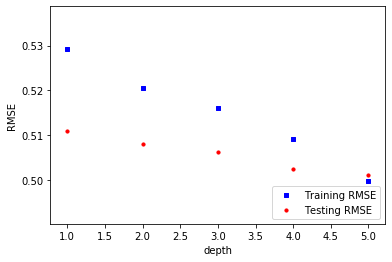

In [12]:
# finding the best depth

test_rmse =[]
train_rmse = []

from sklearn.tree import DecisionTreeRegressor
depthes = [x for x in range(1,6)]
for d in depthes:
    decision_tree = DecisionTreeRegressor(max_depth=d, random_state=0)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    y_pred_train = decision_tree.predict(X_train)
    train_rmse.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    test_rmse.append(sqrt(mean_squared_error(y_test, y_pred)))

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(depthes, train_rmse, s=10, c='b', marker="s", label='Training RMSE')
ax1.scatter(depthes ,test_rmse, s=10, c='r', marker="o", label='Testing RMSE')
ax1.set_ylabel("RMSE")
ax1.set_xlabel("depth")
plt.legend(loc='lower right');
plt.show()
    

In [13]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 3
decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
model_rmse, model_rmse_train, model_name = check_regressor(decision_tree, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_rmse
models_errors_train[model_name] = model_rmse_train
print(compare_performance())

DecisionTreeRegressor: 
 root mean squared error test: 0.5063 
 root mean squared error train: 0.5161 

                          train      test
DecisionTreeRegressor  0.516071  0.506281
Benchmark              0.539486  0.519943


Visualize the tree:

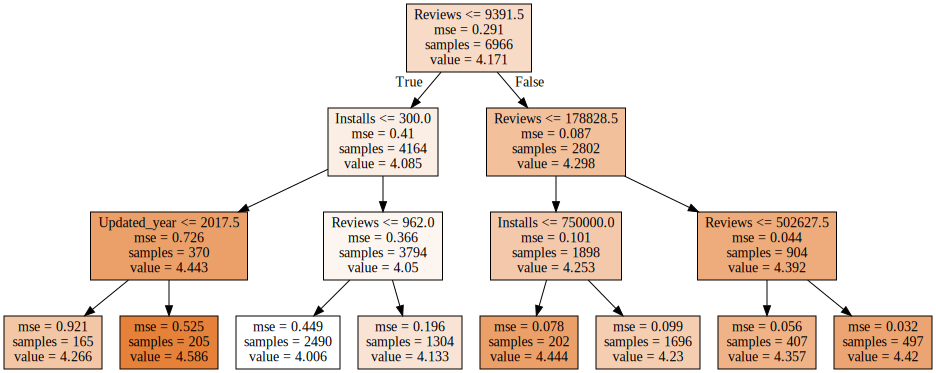

In [14]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

def visualize_tree(tree, features):
    graph = Source(export_graphviz(tree, feature_names=features, filled = True))
    display(SVG(graph.pipe(format='svg')))
    
visualize_tree(decision_tree, features=X_train.columns)

### Random Forest Regressor

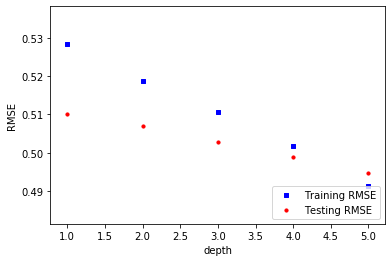

In [15]:
# finding the depth

from sklearn.ensemble import RandomForestRegressor

test_rmse =[]
train_rmse = []


depthes = [x for x in range(1,6)]

for d in depthes:
    forest = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=d)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    y_pred_train = forest.predict(X_train)
    train_rmse.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    test_rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(depthes, train_rmse, s=10, c='b', marker="s", label='Training RMSE')
ax1.scatter(depthes ,test_rmse, s=10, c='r', marker="o", label='Testing RMSE')
ax1.set_ylabel("RMSE")
ax1.set_xlabel("depth")
plt.legend(loc='lower right');
plt.show()
    


In [16]:
feature_scores = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)


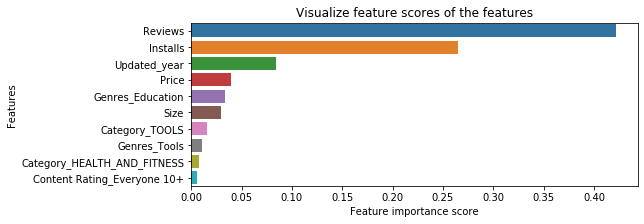

In [17]:
f, ax = plt.subplots(figsize=(8, 3))
top10 = feature_scores.head(10)
ax = sns.barplot(x=top10, y=top10.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor

n_estimators =  100
max_depth = 3
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
model_rmse, model_rmse_train, model_name = check_regressor(random_forest, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_rmse
models_errors_train[model_name] = model_rmse_train
print(compare_performance())

RandomForestRegressor: 
 root mean squared error test: 0.5027 
 root mean squared error train: 0.5105 

                          train      test
RandomForestRegressor  0.510517  0.502689
DecisionTreeRegressor  0.516071  0.506281
Benchmark              0.539486  0.519943


### AdaBoost Regressor

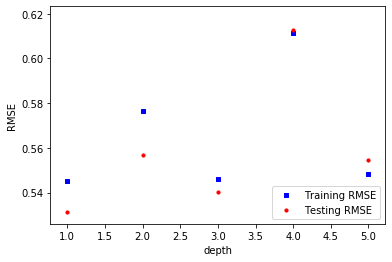

In [19]:
# finding the depth

from sklearn.ensemble import AdaBoostRegressor

test_rmse =[]
train_rmse = []
depthes = [x for x in range(1,6)]

for d in depthes:
    base_estimator = DecisionTreeRegressor(max_depth=d)
    ada_boost = AdaBoostRegressor(random_state=0, n_estimators=100, base_estimator=base_estimator)
    ada_boost.fit(X_train, y_train)
    y_pred = ada_boost.predict(X_test)
    y_pred_train = ada_boost.predict(X_train)
    train_rmse.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    test_rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(depthes, train_rmse, s=10, c='b', marker="s", label='Training RMSE')
ax1.scatter(depthes ,test_rmse, s=10, c='r', marker="o", label='Testing RMSE')
ax1.set_ylabel("RMSE")
ax1.set_xlabel("depth")
plt.legend(loc='lower right');
plt.show()

In [20]:

n_estimators = 100
max_depth = 2
base_estimator = DecisionTreeRegressor(max_depth=max_depth)
ada_boost = AdaBoostRegressor(random_state=0, n_estimators=n_estimators, base_estimator=base_estimator)
model_rmse, model_rmse_train, model_name = check_regressor(ada_boost, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_rmse
models_errors_train[model_name] = model_rmse_train
print(compare_performance())

AdaBoostRegressor: 
 root mean squared error test: 0.5568 
 root mean squared error train: 0.5764 

                          train      test
RandomForestRegressor  0.510517  0.502689
DecisionTreeRegressor  0.516071  0.506281
Benchmark              0.539486  0.519943
AdaBoostRegressor      0.576416  0.556818


### Linear Regressor

In [21]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
model_rmse, model_rmse_train, model_name = check_regressor(linear_regressor, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_rmse
models_errors_train[model_name] = model_rmse_train
print(compare_performance())

LinearRegression: 
 root mean squared error test: 0.5088 
 root mean squared error train: 0.5238 

                          train      test
RandomForestRegressor  0.510517  0.502689
DecisionTreeRegressor  0.516071  0.506281
LinearRegression       0.523840  0.508813
Benchmark              0.539486  0.519943
AdaBoostRegressor      0.576416  0.556818


### Linear Regressor Scaled

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_regressor = LinearRegression()
model_rmse, model_rmse_train, model_name = check_regressor(linear_regressor, X_train, y_train, X_test, y_test)
model_name += 'Scaled'
models_errors[model_name] = model_rmse
models_errors_train[model_name] = model_rmse_train
print(compare_performance())

LinearRegression: 
 root mean squared error test: 0.5088 
 root mean squared error train: 0.5238 

                           train      test
RandomForestRegressor   0.510517  0.502689
DecisionTreeRegressor   0.516071  0.506281
LinearRegression        0.523840  0.508813
LinearRegressionScaled  0.523840  0.508813
Benchmark               0.539486  0.519943
AdaBoostRegressor       0.576416  0.556818


### Lasso

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
model_rmse, model_rmse_train, model_name = check_regressor(lasso, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_rmse
models_errors_train[model_name] = model_rmse_train
print(compare_performance())

Lasso: 
 root mean squared error test: 0.5196 
 root mean squared error train: 0.5386 

                           train      test
RandomForestRegressor   0.510517  0.502689
DecisionTreeRegressor   0.516071  0.506281
LinearRegression        0.523840  0.508813
LinearRegressionScaled  0.523840  0.508813
Lasso                   0.538582  0.519574
Benchmark               0.539486  0.519943
AdaBoostRegressor       0.576416  0.556818


### Lasso Scaled

In [24]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

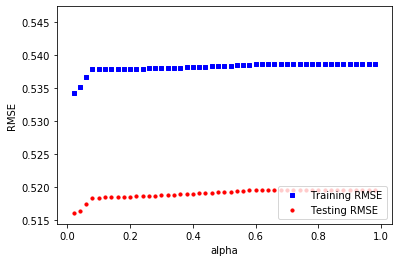

In [25]:
# finding the best alpha 

from sklearn.linear_model import Lasso

test_rmse =[]
train_rmse = []
alphas = [x/50 for x in range(1,50)]

for a in alphas:
    lasso = Lasso(alpha=a)
    ada_boost = AdaBoostRegressor(random_state=0, n_estimators=100, base_estimator=base_estimator)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    y_pred_train = lasso.predict(X_train)
    train_rmse.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    test_rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(alphas, train_rmse, s=10, c='b', marker="s", label='Training RMSE')
ax1.scatter(alphas ,test_rmse, s=10, c='r', marker="o", label='Testing RMSE')
ax1.set_ylabel("RMSE")
ax1.set_xlabel("alpha")
plt.legend(loc='lower right');
plt.show()

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.02)
model_rmse, model_rmse_train, model_name = check_regressor(lasso, X_train_scaled, y_train, X_test_scaled, y_test)
model_name += 'Scaled'
models_errors[model_name] = model_rmse
models_errors_train[model_name] = model_rmse_train
print(compare_performance())

Lasso: 
 root mean squared error test: 0.5136 
 root mean squared error train: 0.5315 

                           train      test
RandomForestRegressor   0.510517  0.502689
DecisionTreeRegressor   0.516071  0.506281
LinearRegression        0.523840  0.508813
LinearRegressionScaled  0.523840  0.508813
LassoScaled             0.531500  0.513562
Lasso                   0.538582  0.519574
Benchmark               0.539486  0.519943
AdaBoostRegressor       0.576416  0.556818


### KNN Regressor

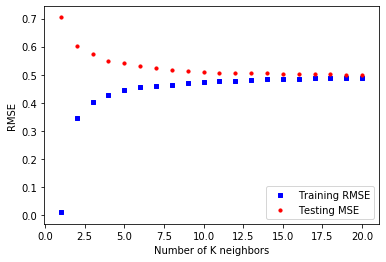

In [27]:
from sklearn.neighbors import KNeighborsRegressor

test_rmse =[]
train_rmse = []
k_values = [x for x in range(1,21)]
    
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    train_rmse.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    test_rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(k_values, train_rmse, s=10, c='b', marker="s", label='Training RMSE')
ax1.scatter(k_values ,test_rmse, s=10, c='r', marker="o", label='Testing MSE')
ax1.set_ylabel("RMSE")
ax1.set_xlabel("Number of K neighbors")
plt.legend(loc='lower right');
plt.show()


from the table above we can see that KNN have the best preformences on the test set with K = 15 and above. we will choose K = 15

In [28]:
from sklearn.neighbors import KNeighborsRegressor

k = 10
nearest_neighbors = KNeighborsRegressor(k)
model_rmse, model_rmse_train, model_name = check_regressor(nearest_neighbors, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_rmse
models_errors_train[model_name] = model_rmse_train
print(compare_performance())

KNeighborsRegressor: 
 root mean squared error test: 0.5106 
 root mean squared error train: 0.4734 

                           train      test
RandomForestRegressor   0.510517  0.502689
DecisionTreeRegressor   0.516071  0.506281
LinearRegression        0.523840  0.508813
LinearRegressionScaled  0.523840  0.508813
KNeighborsRegressor     0.473439  0.510636
LassoScaled             0.531500  0.513562
Lasso                   0.538582  0.519574
Benchmark               0.539486  0.519943
AdaBoostRegressor       0.576416  0.556818


### KNN Scaled Regresor

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

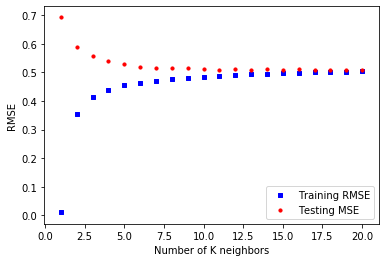

In [30]:
from sklearn.neighbors import KNeighborsRegressor

test_rmse =[]
train_rmse = []
k_values = [x for x in range(1,21)]

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    y_pred_train = knn.predict(X_train_scaled)
    train_rmse.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    test_rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(k_values, train_rmse, s=10, c='b', marker="s", label='Training RMSE')
ax1.scatter(k_values ,test_rmse, s=10, c='r', marker="o", label='Testing MSE')
ax1.set_ylabel("RMSE")
ax1.set_xlabel("Number of K neighbors")
plt.legend(loc='lower right');
plt.show()


In [31]:

k = 10
nearest_neighbors = KNeighborsRegressor(k)
model_rmse, model_rmse_train, model_name = check_regressor(nearest_neighbors, X_train_scaled, y_train, X_test_scaled, y_test)
model_name += 'Scaled'
models_errors[model_name] = model_rmse
models_errors_train[model_name] = model_rmse_train
print(compare_performance())

KNeighborsRegressor: 
 root mean squared error test: 0.5121 
 root mean squared error train: 0.4845 

                              train      test
RandomForestRegressor      0.510517  0.502689
DecisionTreeRegressor      0.516071  0.506281
LinearRegression           0.523840  0.508813
LinearRegressionScaled     0.523840  0.508813
KNeighborsRegressor        0.473439  0.510636
KNeighborsRegressorScaled  0.484492  0.512146
LassoScaled                0.531500  0.513562
Lasso                      0.538582  0.519574
Benchmark                  0.539486  0.519943
AdaBoostRegressor          0.576416  0.556818


### Checking which model is the best

In [32]:
compare_performance()


,train,test
RandomForestRegressor,0.510517,0.502689
DecisionTreeRegressor,0.516071,0.506281
LinearRegression,0.523840,0.508813
LinearRegressionScaled,0.523840,0.508813
KNeighborsRegressor,0.473439,0.510636
KNeighborsRegressorScaled,0.484492,0.512146
LassoScaled,0.531500,0.513562
Lasso,0.538582,0.519574
Benchmark,0.539486,0.519943
AdaBoostRegressor,0.576416,0.556818


8) a

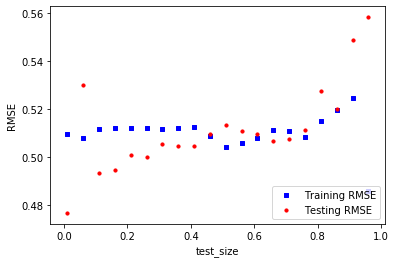

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

test_sizes = [x/100 for x in range(1,100,5)]
train_rmse = []
test_rmse = []
for size in test_sizes:
    train, test = train_test_split(apps, test_size=size, random_state=0, shuffle=True)
    label = 'Rating'
    X_train, y_train = train.drop(label, axis=1), train[label]
    X_test, y_test = test.drop(label, axis=1), test[label]

    forest = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=3)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    y_pred_train = forest.predict(X_train)
    train_rmse.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    test_rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(test_sizes, train_rmse, s=10, c='b', marker="s", label='Training RMSE')
ax1.scatter(test_sizes ,test_rmse, s=10, c='r', marker="o", label='Testing RMSE')
ax1.set_ylabel("RMSE")
ax1.set_xlabel("test_size")
plt.legend(loc='lower right');
plt.show()

